# CROP RECOMMENDATION SYSTEM

A crop recommendation system helps farmers determine the best crops to plant based on various inputs such as soil quality, weather conditions, and other environmental factors. These systems contribute to improving agricultural efficiency, reducing waste, and maximizing crop yield and profit.
In agricultural economies where food production is critical, a well-developed crop recommendation system can greatly enhance productivity, ensuring that the right crops are grown under optimal conditions. By analyzing relevant parameters, these systems provide actionable insights that can help mitigate the risk of crop failures.

This project falls under the larger umbrella of agritech, where technological innovations are increasingly shaping the future of farming.

Why Is It Important?
1. Precision Agriculture: This field focuses on making farming more efficient through data analysis, and crop recommendation systems are a core component.
2. Global Impact: With growing populations, agriculture must become more efficient, making projects like this crucial for food security.
3. Farmers' Support: Many farmers lack the tools to analyze complex environmental data, and such a system provides them with the necessary guidance.


# About the data

The data used in this project is made by augmenting and combining various publicly available datasets of India like weather, soil, etc. You can access the dataset [here](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset). This data is relatively simple with very few but useful features unlike the complicated features affecting the yield of the crop.

The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. Also, it also contains the humidity, temperature and rainfall required for a particular crop. 

### Importing Libraries
* from __future__ import print_function:
Ensures that the print() function behaves consistently across Python 2 and 3, enhancing compatibility. Useful when writing code that can be executed in both versions.

* import pandas as pd:
Pandas is used for data manipulation and analysis, specifically to work with tabular data (like CSV files). It allows for easy data manipulation using DataFrames, making it central to preprocessing and analyzing crop-related datasets.

* import numpy as np:
NumPy provides support for arrays and matrices, which are fundamental for numerical computing in Python. It will be used to handle data transformations and support operations that require linear algebra or mathematical computations.

* import matplotlib.pyplot as plt:
Matplotlib is a plotting library. It’s used for creating static visualizations like line charts, histograms, and scatter plots to help understand trends in the data.

* import seaborn as sns:
Seaborn builds on Matplotlib to create more attractive and informative statistical graphics, such as heatmaps or pair plots, making it easier to explore relationships within the dataset.

* from sklearn.metrics import classification_report:
Part of scikit-learn, used for evaluating the performance of classification models, providing detailed metrics like precision, recall, and F1-score.

* from sklearn import metrics, tree:
Imports tools from scikit-learn for building decision trees and evaluating model performance.

* import warnings and warnings.filterwarnings('ignore'):
Suppresses unnecessary warnings that could clutter the notebook output, ensuring a cleaner presentation.

In [38]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset
* PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv':
Defines the relative file path to the dataset (Crop_recommendation.csv) that contains the crop information.

* df = pd.read_csv(PATH):
Uses Pandas to read the CSV file specified in PATH and load its contents into a DataFrame called df.

Purpose: This DataFrame now holds the dataset, making it accessible for data analysis and model training in the subsequent steps.

In [39]:
PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [40]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [41]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [42]:
df.size

17600

In [43]:
df.shape

(2200, 8)

In [44]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Exploring Unique Labels

df['label'].unique():

This command extracts all unique values from the label column in the DataFrame df.
Purpose: The label column likely represents the target variable, which in this case could be the crops. By using .unique(), it shows a list of all different crops present in the dataset, helping you understand the variety of classes (crops) the model will predict.

In [45]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Checking Data Types

#### df.dtypes:
This command displays the data types of each column in the DataFrame df.
Purpose: Understanding the data types is crucial for data preprocessing and model building, as it helps to identify:
1. Which columns are numerical (e.g., int, float) and which are categorical (e.g., object).
2. If any data type conversions are necessary (e.g., converting categorical data to numerical form for modeling).

In [46]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [47]:
df['label'].value_counts()

jute           100
mothbeans      100
chickpea       100
coffee         100
apple          100
banana         100
muskmelon      100
coconut        100
kidneybeans    100
grapes         100
mungbean       100
blackgram      100
lentil         100
papaya         100
watermelon     100
orange         100
mango          100
pomegranate    100
rice           100
maize          100
cotton         100
pigeonpeas     100
Name: label, dtype: int64

### Visualizing Correlation with a Heatmap

sns.heatmap(df.corr(), annot=True):
* Generates a heatmap to visualize the correlation matrix of the DataFrame df.
* df.corr() computes the pairwise correlation coefficients between numerical columns.
* Purpose: The heatmap visually represents the strength and direction of relationships between features, helping to identify which variables are positively or negatively correlated.
* annot=True adds the correlation values to each cell for easier interpretation.

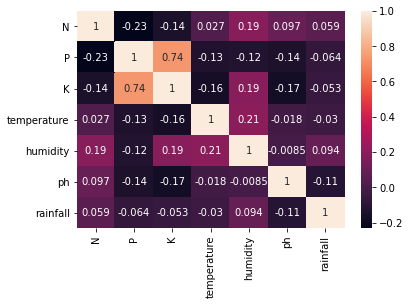

In [48]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

### Preparing Data for Modeling
## Defining Features and Target:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]: Selects relevant predictor variables from the DataFrame.
target = df['label']: Defines the target variable (crop types) for prediction.

#### Initializing Lists:
acc = [] and model = []: Creates empty lists to store model names and their corresponding accuracies.

#### Splitting Data:
from sklearn.model_selection import train_test_split: Imports the function for splitting data.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2): Splits the data into training (80%) and testing (20%) sets for model training and evaluation.
Purpose: This cell prepares the dataset for machine learning by defining the features and target, initializing lists for model performance tracking, and splitting the data into training and testing subsets.

In [49]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [50]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [51]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

#### Implementing a Decision Tree Classifier
* Model Creation: A decision tree classifier is initialized with parameters for evaluating splits, controlling randomness, and limiting depth to avoid overfitting.
* Training: The model is trained on the training data to learn relationships between features and crop types.
* Prediction: The trained model predicts crop types for the test dataset.
* Accuracy Evaluation: The accuracy of the predictions is calculated and stored for comparison with other models.
* Classification Report: A report is generated showing precision, recall, and F1-score for each crop type, offering a comprehensive performance assessment.

Purpose: This cell builds and evaluates a Decision Tree classifier for predicting crop types based on environmental features.

In [52]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

### Cross-Validation Import: Imports cross_val_score from scikit-learn to evaluate the model's performance.

In [53]:
from sklearn.model_selection import cross_val_score

### Cross-Validation Execution: The cross_val_score function calculates the accuracy of the Decision Tree classifier using 5-fold cross-validation on the entire dataset.

In [54]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

### Score Output: The resulting scores represent the model's accuracy across different subsets of the data.

In [55]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving the Decision Tree Model

* Importing Pickle: The pickle library is imported for serializing and saving Python objects.

* Model Filename: A filename (DecisionTree.pkl) is specified for saving the trained Decision Tree model.

* Opening a File: A file is opened in write-binary mode ('wb') to create a new file for storing the model.

* Saving the Model: The trained Decision Tree model is serialized and saved to the file using pickle.dump(), which allows for later retrieval and use without needing to retrain.

* Closing the File: The file is closed to ensure that all data is properly written and resources are released.

In [56]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [58]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [59]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Implementing a Support Vector Machine (SVM) Classifier

* Model Introduction: The cell begins by indicating the implementation of a Support Vector Machine (SVM) classifier.

* Importing the Classifier: The SVC (Support Vector Classification) from the scikit-learn library is imported for building the SVM model.

* Creating the Model: An instance of SVC is initialized with the parameter gamma='auto', which controls the influence of individual training examples on the decision boundary.

* Fitting the Model: The SVM model is trained using the training dataset (Xtrain for features and Ytrain for labels). This step allows the model to learn how to classify the data based on the given features.

* Making Predictions: The trained SVM model predicts crop types for the test dataset (Xtest), and the results are stored in predicted_values.

* Evaluating Model Accuracy: The accuracy of the predictions is calculated by comparing the predicted values to the actual test labels (Ytest). The accuracy score is appended to the acc list for further comparison.

* Printing Accuracy: The accuracy score is printed, providing a measure of the model's performance.

* Generating Classification Report: A classification report is generated, detailing metrics such as precision, recall, and F1-score for each crop type, allowing for a thorough evaluation of the model's performance.

#### Purpose: This cell trains and evaluates a Support Vector Machine classifier, providing insights into its accuracy and effectiveness in predicting crop types based on environmental features.








In [60]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [61]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Implementing Logistic Regression

* Model Introduction: The cell begins by indicating the implementation of a Logistic Regression classifier.

* Importing the Classifier: The LogisticRegression class from the scikit-learn library is imported for creating the logistic regression model.

* Creating the Model: An instance of LogisticRegression is initialized with a parameter for random_state=2, which ensures that the results are reproducible.

* Fitting the Model: The logistic regression model is trained on the training dataset, using Xtrain for the features and Ytrain for the target labels. This allows the model to learn how to make predictions based on the input data.

* Making Predictions: The trained model is used to predict crop types for the test dataset (Xtest), and the results are stored in predicted_values.

* Evaluating Model Accuracy: The accuracy of the predictions is calculated by comparing the predicted values against the actual test labels (Ytest). The accuracy score is appended to the acc list for future comparison.

* Printing Accuracy: The accuracy score is printed, providing a measure of how well the logistic regression model performed.

* Generating Classification Report: A classification report is produced, detailing metrics such as precision, recall, and F1-score for each crop type, allowing for an in-depth evaluation of the model's performance.

#### Purpose: This cell trains and evaluates a Logistic Regression classifier, offering insights into its accuracy and overall effectiveness in predicting crop types based on environmental features.

In [62]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [63]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

* Importing Pickle: The pickle library is imported to handle the serialization of Python objects, enabling saving and loading of models.

* Model Filename: A filename (LogisticRegression.pkl) is specified for saving the trained logistic regression model.

* Opening a File: A file is opened in write-binary mode ('wb') to create a new file for storing the model.

* Saving the Model: The trained logistic regression model is serialized and saved to the file using pickle.dump(). This allows the model to be reused later without needing to retrain it.

* Closing the File: The file is closed to ensure that all data is properly written and resources are released.

#### Purpose: This cell saves the trained Logistic Regression model to a file, facilitating its reuse in future sessions without the need for retraining, which is efficient for deployment and testing.

In [64]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Implementing a Random Forest Classifier

* Model Introduction: The cell begins by indicating the implementation of a Random Forest classifier.

* Importing the Classifier: The RandomForestClassifier from the scikit-learn library is imported to create the random forest model.

* Creating the Model: An instance of RandomForestClassifier is initialized with parameters, including n_estimators=20, which specifies the number of trees in the forest, and random_state=0 for reproducibility.

* Fitting the Model: The random forest model is trained using the training dataset (Xtrain for features and Ytrain for labels). This training process allows the model to learn patterns in the data.

* Making Predictions: The trained model predicts crop types for the test dataset (Xtest), with the predicted values stored in predicted_values.

* Evaluating Model Accuracy: The accuracy of the predictions is calculated by comparing the predicted values to the actual labels in the test dataset (Ytest). This accuracy score is appended to the acc list for later comparison.

* Printing Accuracy: The accuracy score is printed, providing a quantitative measure of how well the random forest model performed.

* Generating Classification Report: A classification report is generated, detailing metrics such as precision, recall, and F1-score for each crop type, allowing for a comprehensive evaluation of the model's performance.

#### Purpose: This cell trains and evaluates a Random Forest classifier, providing insights into its accuracy and effectiveness in predicting crop types based on environmental features.

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [66]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [67]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

This cell implements an XGBoost classifier to predict crop types based on environmental features. It begins by importing the XGBClassifier from the xgboost library and then initializes the model. The classifier is trained on the training dataset using Xtrain for features and Ytrain for labels, allowing it to learn the underlying patterns in the data. After training, the model makes predictions on the test dataset (Xtest), and the accuracy of these predictions is calculated by comparing them to the actual labels in Ytest. This accuracy score is appended to the acc list for further analysis. Finally, the accuracy score is printed, and a classification report is generated, providing metrics such as precision, recall, and F1-score for each crop type, which helps assess the model's performance in making accurate predictions.

In [68]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [69]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

### Saving trained XGBoost model

In [70]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

This cell visualizes the accuracy of different classification algorithms used to predict crop types. A bar plot is created using Seaborn, with the x-axis representing accuracy scores and the y-axis displaying the names of the models. The plot is titled "Accuracy Comparison," enabling a quick visual assessment of which algorithm performed best in terms of accuracy.

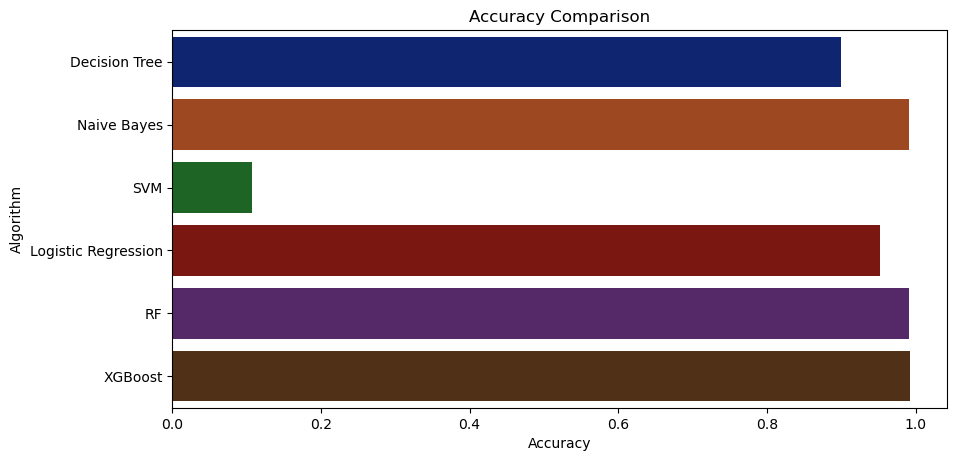

In [71]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [72]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182


## Making Predictions

* Define Input Data: An input array is created to represent specific environmental conditions, including values for nitrogen, phosphorus, potassium, temperature, humidity, pH, and rainfall.

* Make Prediction: The Random Forest model is used to predict the crop type based on the defined environmental conditions by calling its prediction method.

* Print Prediction: The predicted crop type is displayed, indicating the model's recommendation for the given parameters.

* Repeat for New Data: A second input array is defined with a different set of environmental conditions.

* Make Second Prediction: The model's prediction method is called again with the new input data to generate another prediction.

* Print Second Prediction: The predicted crop type for the second set of conditions is displayed.

#### Purpose: This cell showcases how to utilize the trained Random Forest model to provide crop type recommendations based on varying agricultural inputs.

In [73]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [74]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
